# Customer Segmentation Using Kmeans Clustering

# Step 1 : Import Dependencies

In [1]:
# Importing the liabraries

import pandas as pd                               # to read the csv file
import matplotlib.pyplot as plt                   # used for Data visualisation
import numpy as np                                # used for performing mathematical and logical operations
import seaborn as sns                             # used for Data visualisation

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline                                
# will make your plot outputs appear and be stored within the notebook

# Step 2 : Import Data

In [2]:
# read data into a dataframe

df = pd.read_csv("DATA\Mall_Customers.csv", index_col=0, header=0)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


# Step 3 : EDA

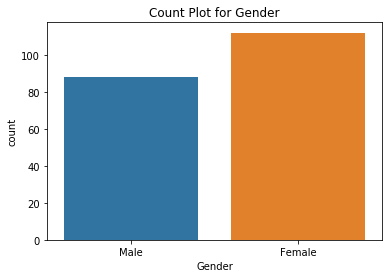

In [3]:
# count plot on single categorical variable
sns.countplot(x = "Gender", data = df)

plt.title("Count Plot for Gender")
# show the plot
plt.show()

- From the above chart we can observe that there are more female customers than that of male customers. The difference between both would be almost 5% - 10 %

In [4]:
df["Gender"].value_counts()               # used to count category counts

Female    112
Male       88
Name: Gender, dtype: int64

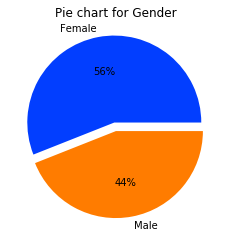

In [5]:
# declaring data
data = [112,88]
keys = ["Female", "Male"]

# declaring exploding pie
explode = [0.1, 0]

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels = keys, colors = palette_color, explode = explode, autopct = "%.0f%%")

plt.title("Pie chart for Gender")
# displaying chart
plt.show()

In [6]:
sns.__version__    # to check the version of seaborn liabrary

'0.12.2'

In [7]:
pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\majid\anaconda3\lib\site-packages (0.12.2)
Note: you may need to restart the kernel to use updated packages.


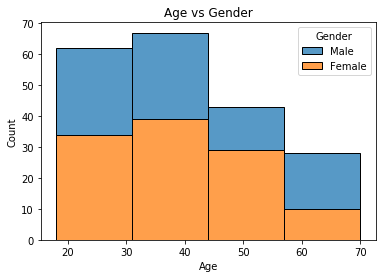

In [8]:
# plot histogram

sns.histplot(data = df,
             x = "Age", 
             bins = 4,
             hue = "Gender",
             multiple = "stack",
             kde = False)

plt.title("Age vs Gender")
plt.show()

- From the above plot we observe that thre are more female customers in the age group of 20-30, 30-40,40-50 as compared to male customers.Only for age group 60-70 male customers are more than the female customers.

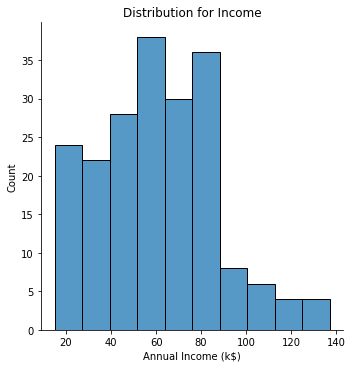

In [9]:
sns.displot(df, x="Annual Income (k$)")
plt.title("Distribution for Income")
plt.show()

- From the above distribution plot we may observe that there are more person in the income group of 20-90 (k) as compared to 90-140 (k)

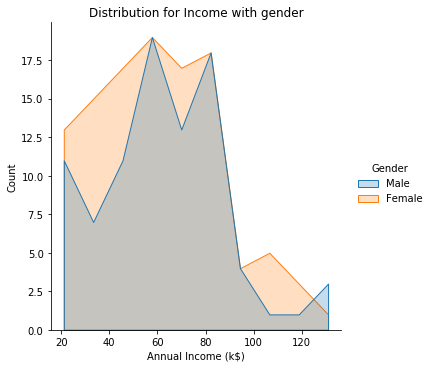

In [10]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", element="poly")
plt.title("Distribution for Income with gender")
plt.show()

- From the above plot we may observe that 

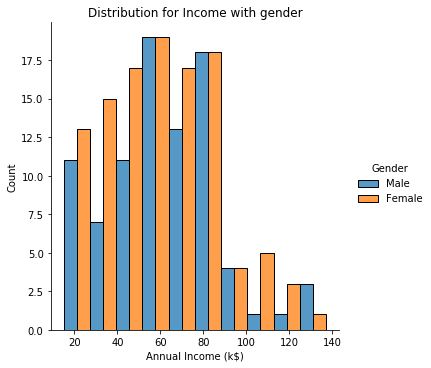

In [11]:
sns.displot(df, x="Annual Income (k$)", hue="Gender", multiple="dodge")
plt.title("Distribution for Income with gender")
plt.show()

- From the above plot we can observe that 

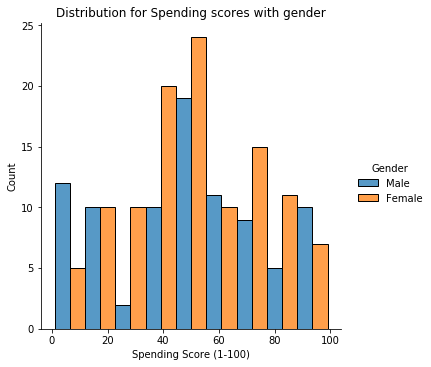

In [12]:
sns.displot(df, x="Spending Score (1-100)", hue="Gender", multiple="dodge")
plt.title("Distribution for Spending scores with gender")
plt.show()

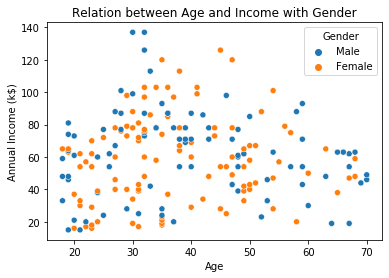

In [13]:
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)", hue="Gender")
plt.title("Relation between Age and Income with Gender")
plt.show()

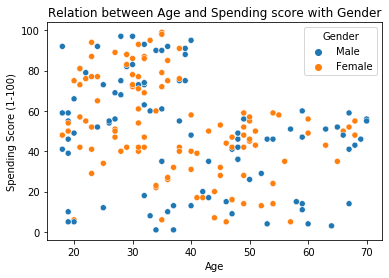

In [14]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation between Age and Spending score with Gender")
plt.show()

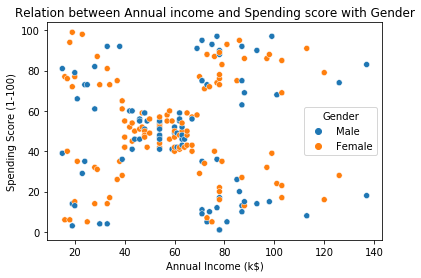

In [15]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
plt.title("Relation between Annual income and Spending score with Gender")
plt.show()

# Step 4 : Data Preprocessing

In [16]:
print(df.shape)
print()
print(df.info())
print()
print(df.isnull().sum())

(200, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [17]:
df.describe(include="all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

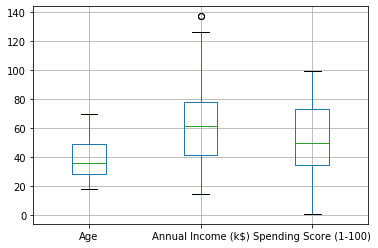

In [19]:
df.boxplot()
plt.show()

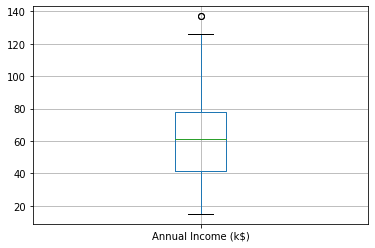

In [20]:
df.boxplot("Annual Income (k$)")
plt.show()

In [21]:
X = df.iloc[:, 2:4]   # [ start_row : stop_row , start_coln : start_coln ]

In [22]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [23]:
%%time



# Using the elbow method to find the optimal numbar of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15
wsse = []

# progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range(1, K_MAX):
        
        kmeans = KMeans(n_clusters = i, random_state = 10)
        kmeans.fit(X)
        wsse.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 12.6 s


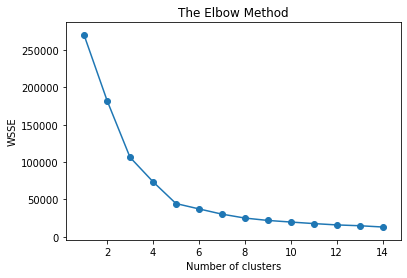

In [24]:
plt.plot(range(1, K_MAX), wsse)
plt.scatter(range(1, K_MAX), wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()

In [25]:
print(wsse[4])

44448.45544793371


In [26]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [27]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [28]:
kmeans.n_iter_

3

In [29]:
df["Clusters"] = Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


#### Kaggle

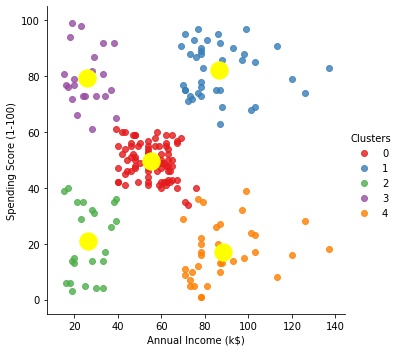

In [30]:
sns.lmplot(data = df,
          x = "Annual Income (k$)",
          y = "Spending Score (1-100)",
          fit_reg = False,  #No regression Line
          hue = "Clusters",
          palette = "Set1")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = "yellow")

plt.show()

In [31]:
df["Clusters"]=df.Clusters.map({0:"Careless",1:"Sensible",2:"Target",3:"Notuseful",4:"Careful"})

In [32]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,Notuseful
3,Female,20,16,6,Target
4,Female,23,16,77,Notuseful
5,Female,31,17,40,Target
6,Female,22,17,76,Notuseful
7,Female,35,18,6,Target
8,Female,23,18,94,Notuseful
9,Male,64,19,3,Target


In [33]:
df.to_csv(r"TargetCustomers.csv",index=True)